In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df  = pd.read_csv("demo_close.csv").drop(['Unnamed: 0'], axis = 1).sort_values(by = ['k','h']).reset_index(drop = True)

In [ ]:
def plotting_k_analyst(k):
    # remove sort_value.... for full graph
    cummulative_return = (df[df['k'] == k].iloc[:,2:] + 1).cumprod(axis = 1).reset_index(drop= True).sort_values(by = ['2023-12-29 00:00:00+01:00'], ascending = False)[:10]

    fig, ax = plt.subplots(figsize=(24, 12))
    for x in range(0,30):
        try:
            ax.plot(cummulative_return.loc[x], label = "h = " +str(x +1))
            ax.legend()
        except: pass
    plt.title('Cummulative Return when k = ' + str(k))

    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.show()

    return

In [71]:
def plotting_h_analyst(h):
    
    cummulative_return = (df[df['h'] == h].iloc[:,2:] + 1).cumprod(axis = 1).reset_index(drop= True).sort_values(by = ['2023-12-29 00:00:00+01:00'], ascending = False)[1:5]

    fig, ax = plt.subplots(figsize=(24, 12))
    for x in range(0,30):
        try:
            ax.plot(cummulative_return.loc[x], label = "k = " +str(x +1))
            ax.legend()
        except: pass
    plt.title('Cummulative Return when h = ' + str(h))

    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.show()

    return

   2020-01-02 00:00:00+01:00  2020-01-03 00:00:00+01:00  \
1                        1.0                        1.0   
3                        1.0                        1.0   
0                        1.0                        1.0   
2                        1.0                        1.0   
4                        1.0                        1.0   
5                        1.0                        1.0   

   2020-01-06 00:00:00+01:00  2020-01-07 00:00:00+01:00  \
1                   1.004096                   1.009879   
3                   1.004096                   1.009879   
0                   1.004096                   0.994166   
2                   1.004096                   1.009879   
4                   1.004096                   1.009879   
5                   1.004096                   1.009879   

   2020-01-08 00:00:00+01:00  2020-01-09 00:00:00+01:00  \
1                   1.010057                   1.016436   
3                   1.015563                   1.02898

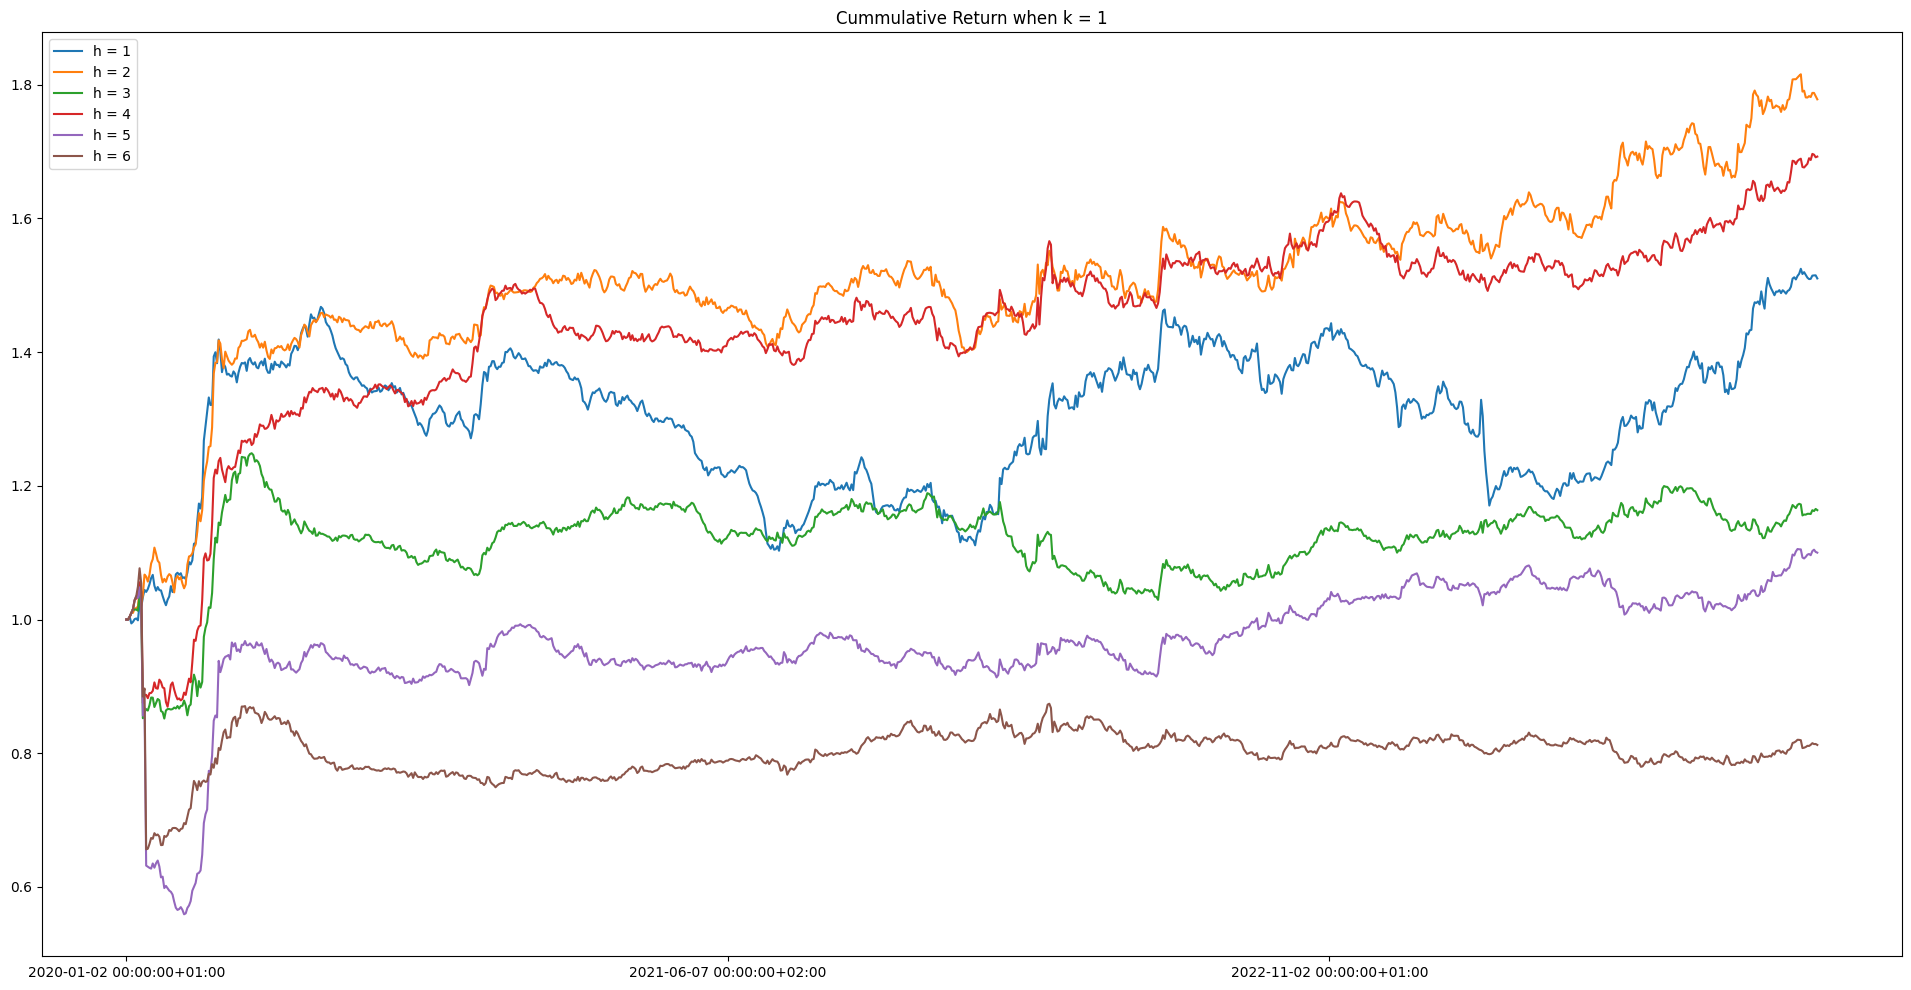

In [72]:
plotting_k_analyst(1)

In [73]:
def cummulative_returning(data):
    return  (data.iloc[:,2:] + 1).cumprod(axis = 1).iloc[:,-1]

In [74]:
def annualise_return(data):
    return (1 + cummulative_returning(data))**(365/ (data.shape[1] - 2))

In [75]:
import yfinance as yf

tolerance = 0.
k = 1
h = 1

# rule = 'BME'

time_range = '5y'

start_time = '2019-12-31'
end_time = '2024-01-01'

# Vol scaling
vol_flag = 0                  # Set flag to 1 for vol targeting
if vol_flag == 1:
    target_vol = 0.4 # Can be changed
else:
    target_vol = 'no target vol'


In [76]:
def US_Stock_data():

    stock_list =['^STOXX50E']
    futures = pd.DataFrame(columns= stock_list)

    time_index = list(yf.Ticker(stock_list[0]).history(period = time_range,start = start_time, end = end_time).index)
    flag = 0

    for symbol in stock_list:
        df = yf.Ticker(symbol).history(period = time_range, start = start_time, end = end_time)
        df = pd.DataFrame(df['Close'])
        i = 0
        daily_return = []
        for k in df['Close']:
            if i != 0:
                daily_return.append(float((k-i)/i))
            else:
                daily_return.append(float(0))
            i = k
        if time_index != list(df.index): flag +=1
        try:
            futures[symbol] = daily_return
        except:
            print(symbol)
            print(len(daily_return)) # Check differnet time index
            while len(daily_return) < len(futures):
                daily_return.insert(0,float(0))
            futures[symbol] = daily_return

    futures.index = time_index
    futures = futures.iloc[1:, :]


    # print(flag) # Check differnet time index

    futures['Date'] = pd.to_datetime(futures.index, format='%Y-%m-%d')
    futures.set_index('Date', inplace=True)

    return futures

In [77]:
EU_50 = US_Stock_data().transpose()

In [78]:
EU_50

Date,2020-01-06 00:00:00+01:00,2020-01-07 00:00:00+01:00,2020-01-08 00:00:00+01:00,2020-01-09 00:00:00+01:00,2020-01-10 00:00:00+01:00,2020-01-13 00:00:00+01:00,2020-01-14 00:00:00+01:00,2020-01-15 00:00:00+01:00,2020-01-16 00:00:00+01:00,2020-01-17 00:00:00+01:00,...,2023-12-14 00:00:00+01:00,2023-12-15 00:00:00+01:00,2023-12-18 00:00:00+01:00,2023-12-19 00:00:00+01:00,2023-12-20 00:00:00+01:00,2023-12-21 00:00:00+01:00,2023-12-22 00:00:00+01:00,2023-12-27 00:00:00+01:00,2023-12-28 00:00:00+01:00,2023-12-29 00:00:00+01:00
^STOXX50E,-0.005526,0.001793,0.003541,0.006181,-0.001675,-0.002597,-0.00127,-0.001568,0.001374,0.009041,...,0.00198,0.002265,-0.006223,0.003156,-0.000348,-0.001976,-0.000749,0.001528,-0.003092,0.00161


In [79]:
EU_50.mean(axis=1)/EU_50.std(axis=1)

^STOXX50E    0.019766
dtype: float64

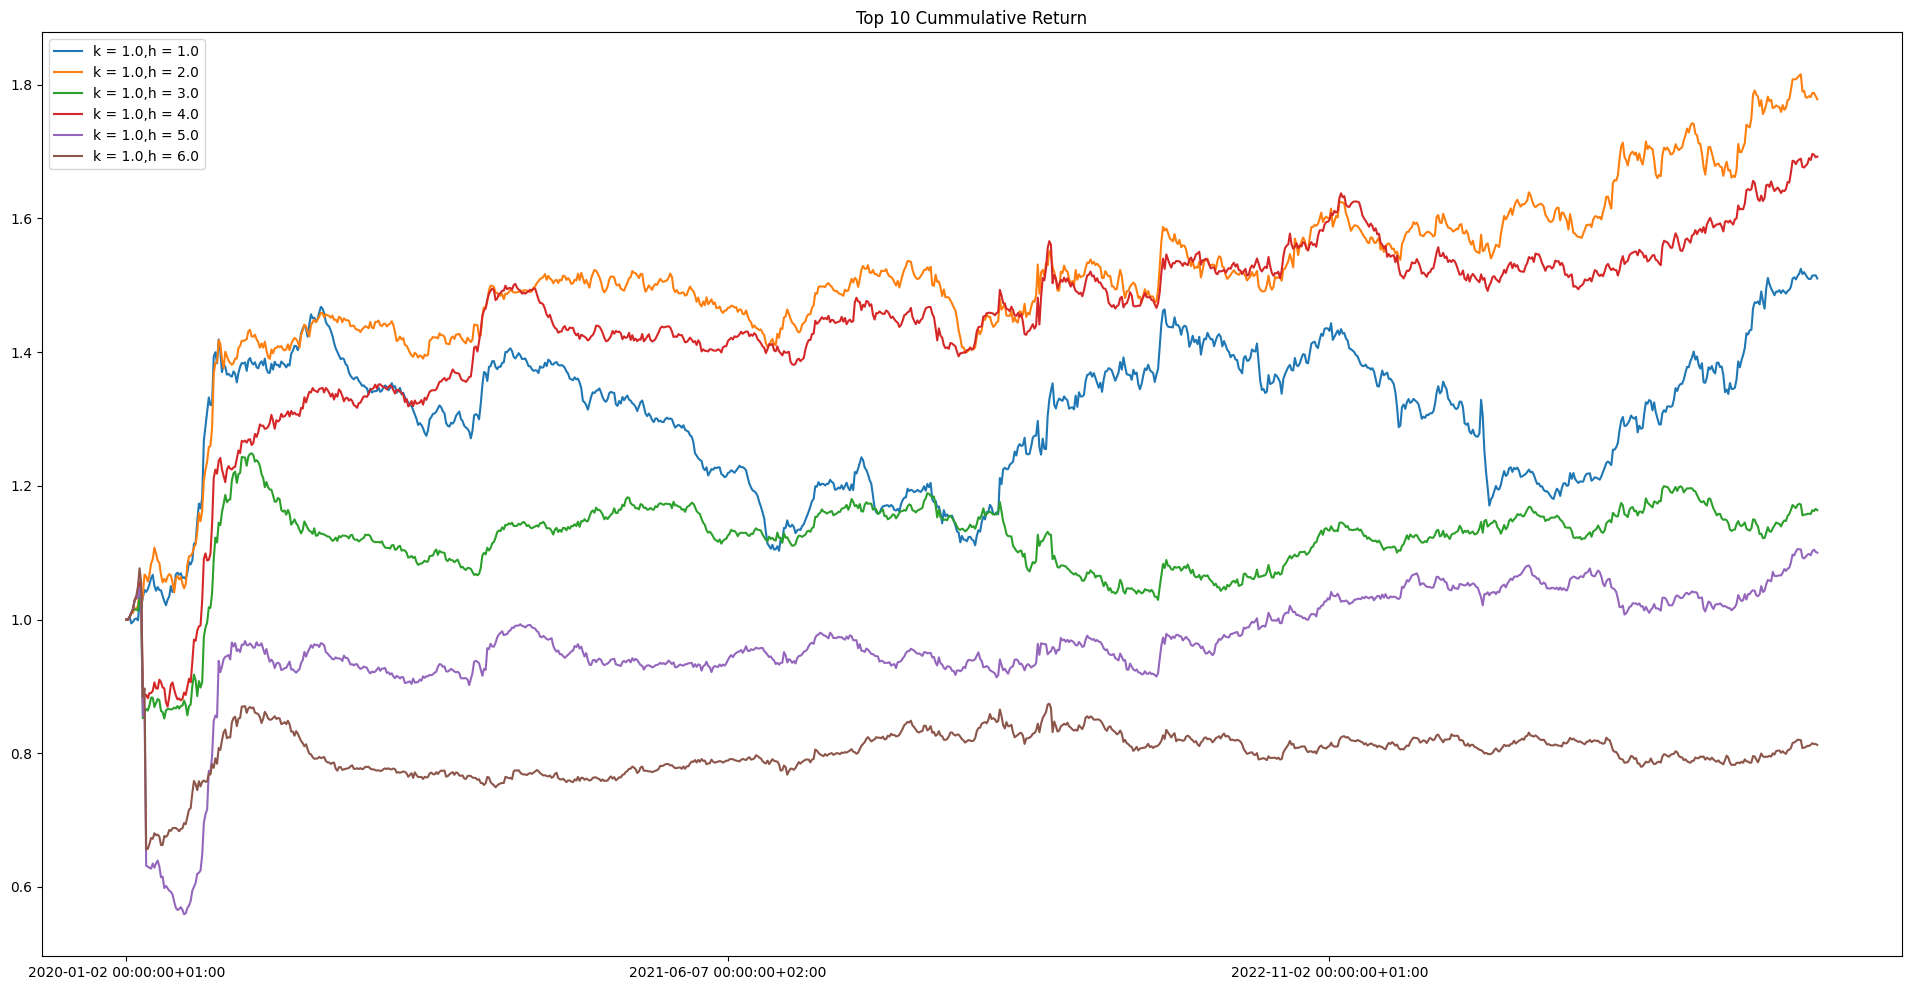

In [80]:
cummulative_return = (df.iloc[:,2:] + 1).cumprod(axis = 1).reset_index(drop= True).sort_values(by = ['2023-12-29 00:00:00+01:00'], ascending = False)[:10]

fig, ax = plt.subplots(figsize=(24, 12))
for x in range(0,64):
    try:
        ax.plot(cummulative_return.loc[x], label = "k = " +str(df.loc[x]['k']) + ",h = "+ str(df.loc[x]['h']))
        ax.legend()
    except: pass
plt.title('Top 10 Cummulative Return')

ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

In [81]:
def sharpe_ratio(data):
    return data.iloc[:,2:].mean(axis=1)/data.iloc[:,2:].std(axis=1)

In [82]:
def maximum_drawdown(data):
    return data.iloc[:,2:].min(axis=1)

In [83]:
def calmar_ratio(data):
    return annualise_return(data)/ -maximum_drawdown(data)

In [84]:
# cum_return = cummulative_returning(df)
# annual_return = annualise_return(df)
# sharpe_ratio =  sharpe_ratio(df)
# max_drawdown = maximum_drawdown(df)
# calmar_ratio = calmar_ratio(df)

In [85]:
df_benchmark = pd.DataFrame()

df_benchmark['cum_return'] = cummulative_returning(df)
df_benchmark['annual_return'] = annualise_return(df)
df_benchmark['sharpe_ratio'] =  sharpe_ratio(df)
df_benchmark['max_drawdown'] = maximum_drawdown(df)
df_benchmark['calmar_ratio'] = calmar_ratio(df)

df_benchmark['k'] = df['k']
df_benchmark['h'] = df['h']

df_benchmark

,cum_return,annual_return,sharpe_ratio,max_drawdown,calmar_ratio,k,h
0,1.510199,1.386941,0.053896,-0.039962,34.706520,1.0,1.0
1,1.778117,1.437841,0.086689,-0.028544,50.372137,1.0,2.0
2,1.163587,1.315595,0.022464,-0.160503,8.196701,1.0,3.0
3,1.692473,1.421928,0.067243,-0.159728,8.902208,1.0,4.0
4,1.100029,1.301728,0.014386,-0.271846,4.788475,1.0,5.0
5,0.812392,1.235332,-0.011548,-0.268179,4.606379,1.0,6.0


In [86]:
df_benchmark.to_csv("benchmark.csv")

In [87]:
df_benchmark.sort_values(by = ['sharpe_ratio'], ascending = False)

,cum_return,annual_return,sharpe_ratio,max_drawdown,calmar_ratio,k,h
1,1.778117,1.437841,0.086689,-0.028544,50.372137,1.0,2.0
3,1.692473,1.421928,0.067243,-0.159728,8.902208,1.0,4.0
0,1.510199,1.386941,0.053896,-0.039962,34.706520,1.0,1.0
2,1.163587,1.315595,0.022464,-0.160503,8.196701,1.0,3.0
4,1.100029,1.301728,0.014386,-0.271846,4.788475,1.0,5.0
5,0.812392,1.235332,-0.011548,-0.268179,4.606379,1.0,6.0


In [ ]:
import seaborn as sns

cum_return_df = df_benchmark.pivot(index = 'h', columns='k', values='cum_return')
# annual_return_df = df.pivot(index='h', columns='k', values='annual_return')
sharpe_ratio_df = df_benchmark.pivot(index='h', columns='k', values='sharpe_ratio')
max_drawdown_df = df_benchmark.pivot(index='h', columns='k', values='max_drawdown')
calmar_ratio_df = df_benchmark.pivot(index='h', columns='k', values='calmar_ratio')

# Define a function to create heatmaps
def create_heatmap(df, metric_name):
    plt.figure(figsize=(15, 12))  # Larger figure size for width and height
    sns.heatmap(df, annot=True, cmap='coolwarm',  # Adjust annotation size
                annot_kws = {'size': 8})  # Larger annotation size
    plt.title(f'{metric_name} Heatmap', fontsize=16)  # Larger title
    plt.xlabel('k', fontsize=12)  # Larger x-axis label
    plt.ylabel('h', fontsize=12)  # Larger y-axis label

    # for metric in ['cum_return', 'annual_return', 'sharpe_ratio', 'max_drawdown', 'calmar_ratio']:
    #   df[6, 27] == mean()
    plt.show()

# Create heatmaps for each metric
create_heatmap(cum_return_df, 'Cumulative Return')
# create_heatmap(annual_return_df, 'Annual Return')
create_heatmap(sharpe_ratio_df, 'Sharpe Ratio')
create_heatmap(max_drawdown_df, 'Max Drawdown')
create_heatmap(calmar_ratio_df, 'Calmar Ratio')

In [89]:
cummulative_return = (df.iloc[:,2:] + 1).cumprod(axis = 1)

cummulative_return.sort_values(by = ['2023-12-29 00:00:00+01:00'], ascending = False)

,2020-01-02 00:00:00+01:00,2020-01-03 00:00:00+01:00,2020-01-06 00:00:00+01:00,2020-01-07 00:00:00+01:00,2020-01-08 00:00:00+01:00,2020-01-09 00:00:00+01:00,2020-01-10 00:00:00+01:00,2020-01-13 00:00:00+01:00,2020-01-14 00:00:00+01:00,2020-01-15 00:00:00+01:00,...,2023-12-14 00:00:00+01:00,2023-12-15 00:00:00+01:00,2023-12-18 00:00:00+01:00,2023-12-19 00:00:00+01:00,2023-12-20 00:00:00+01:00,2023-12-21 00:00:00+01:00,2023-12-22 00:00:00+01:00,2023-12-27 00:00:00+01:00,2023-12-28 00:00:00+01:00,2023-12-29 00:00:00+01:00
1,1.0,1.0,1.004096,1.009879,1.010057,1.016436,1.016959,1.019498,1.043567,1.021529,...,1.789700,1.791004,1.780986,1.780765,1.782941,1.781496,1.787699,1.787690,1.782901,1.778117
3,1.0,1.0,1.004096,1.009879,1.015563,1.028986,1.031758,1.034334,1.055708,1.041374,...,1.676875,1.676147,1.678842,1.681706,1.689986,1.687388,1.696508,1.695338,1.691409,1.692473
0,1.0,1.0,1.004096,0.994166,0.996529,1.000564,1.001588,0.998800,1.023718,1.018292,...,1.516807,1.519585,1.515484,1.511357,1.509216,1.509547,1.514388,1.514706,1.514840,1.510199
2,1.0,1.0,1.004096,1.009879,1.015563,1.014685,1.015049,1.013188,1.037184,1.015331,...,1.155704,1.157015,1.156915,1.158123,1.158161,1.157865,1.163521,1.162231,1.165410,1.163587
4,1.0,1.0,1.004096,1.009879,1.015563,1.028986,1.035203,1.032413,1.048145,1.023853,...,1.092745,1.091337,1.093719,1.097008,1.098030,1.096184,1.102333,1.104456,1.101165,1.100029
5,1.0,1.0,1.004096,1.009879,1.015563,1.028986,1.035203,1.049338,1.076677,1.053941,...,0.807710,0.808265,0.809279,0.811072,0.810889,0.812602,0.815016,0.813682,0.813863,0.812392


In [90]:
cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

C:\Users\hungl\AppData\Local\Temp\ipykernel_11184\640027445.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  cummulative_return.columns = pd.to_datetime(cummulative_return.columns)


C:\Users\hungl\AppData\Local\Temp\ipykernel_11184\1610080271.py:7: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  cummulative_return.columns = pd.to_datetime(cummulative_return.columns)


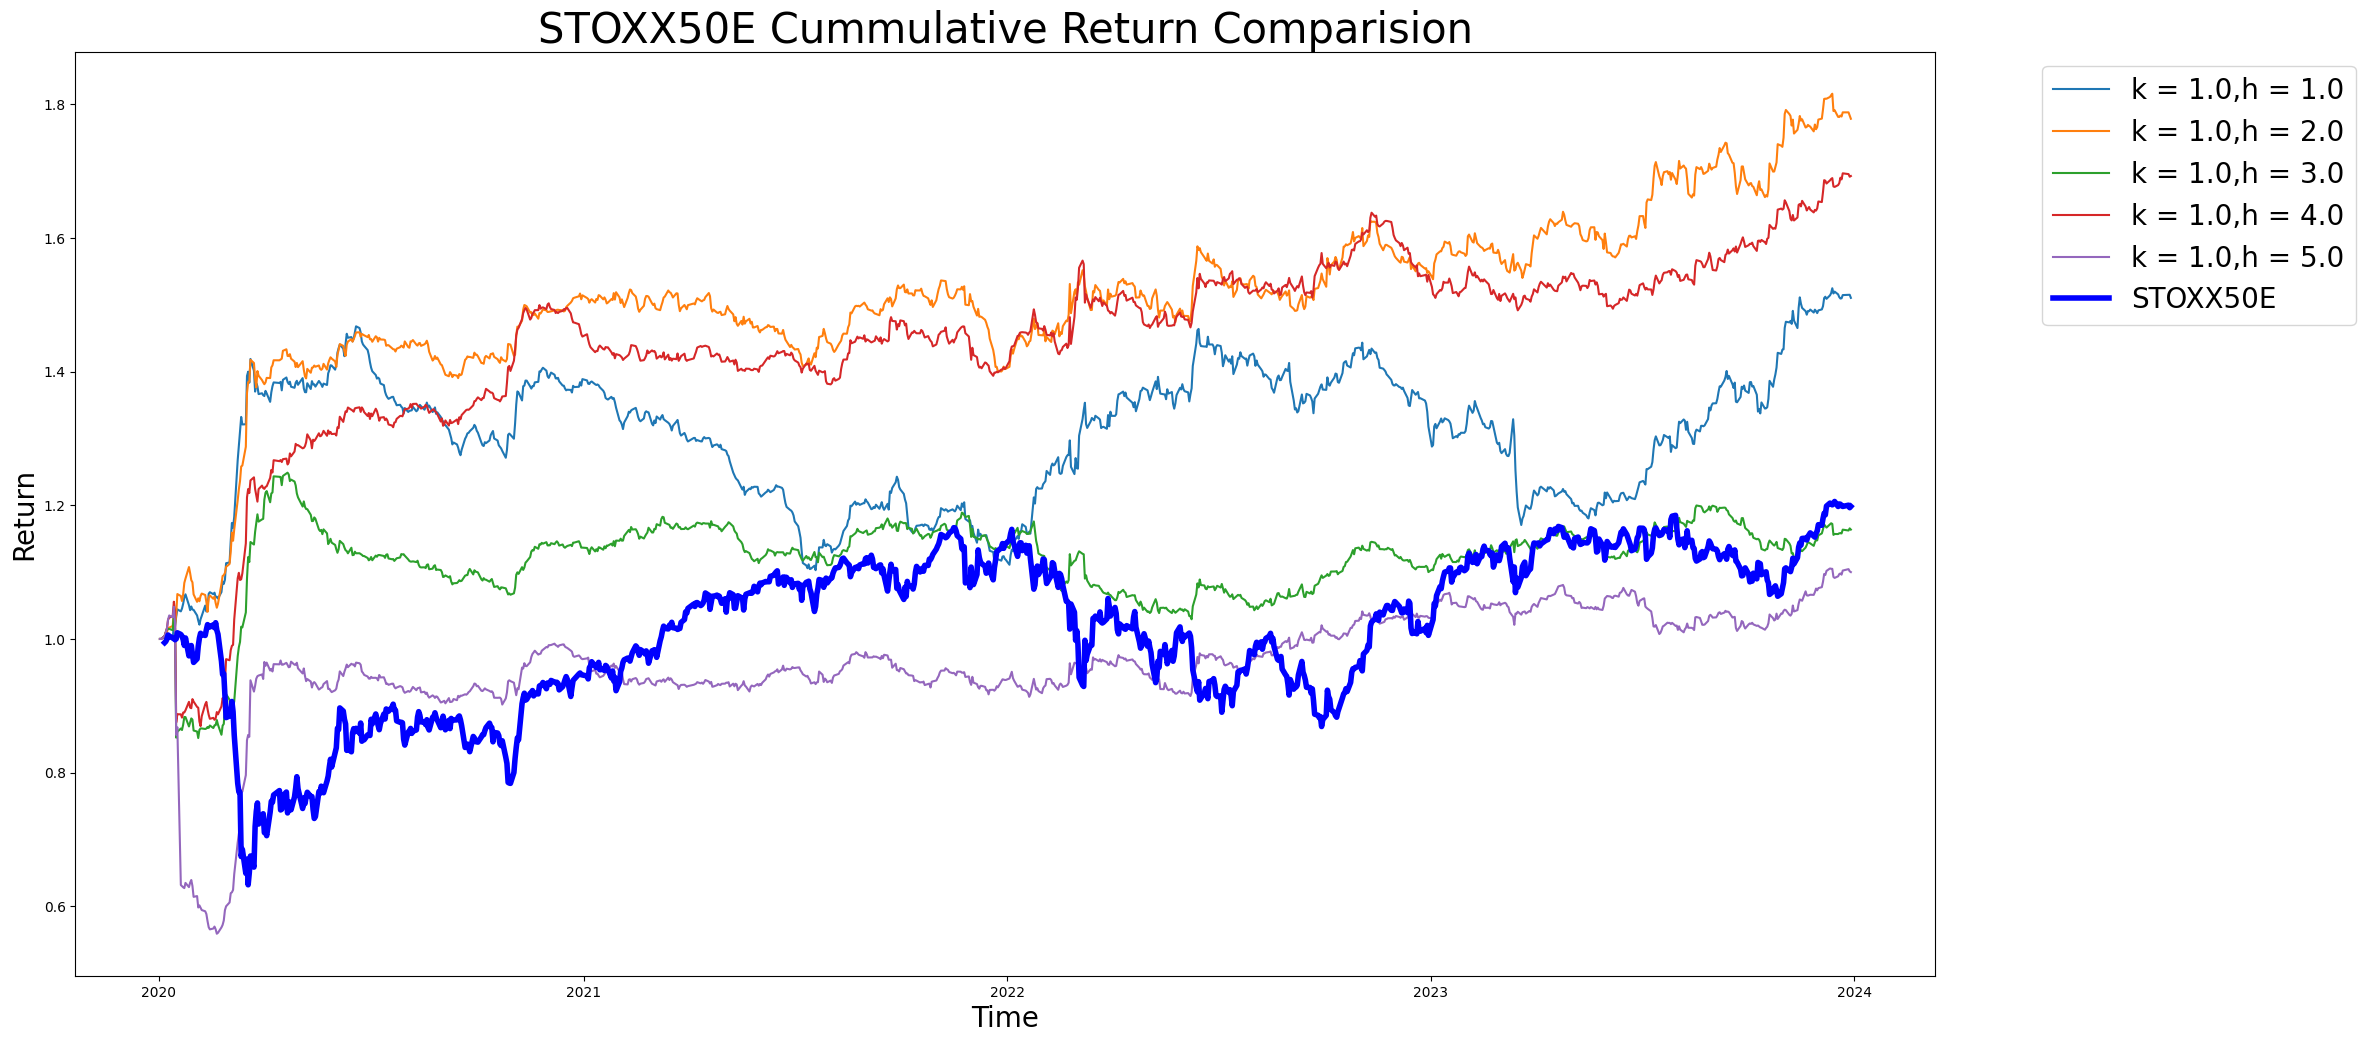

In [91]:
fig, ax = plt.subplots(figsize=(24, 12))

benchmark = (EU_50+1).cumprod(axis = 1).loc['^STOXX50E']

cummulative_return = (df.iloc[:,2:] + 1).cumprod(axis = 1).reset_index(drop= True).sort_values(by = ['2023-12-29 00:00:00+01:00'], ascending = False)[:5]

cummulative_return.columns = pd.to_datetime(cummulative_return.columns)

for x in range(0,64):
    try:
        ax.plot(cummulative_return.loc[x], label = "k = " +str(df.loc[x]['k']) + ",h = "+ str(df.loc[x]['h']))
        ax.legend()
    except: pass

ax.xaxis.set_major_locator(mdates.YearLocator())

ax.plot(benchmark, color = 'Blue', linewidth = 4., label = 'STOXX50E')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 20)

ax.set_xlabel("Time", fontsize = 20)
ax.set_ylabel("Return", fontsize = 20)


plt.title('STOXX50E Cummulative Return Comparision', fontsize = 30)
plt.show()
